In [7]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [12]:
quandl.ApiConfig.api_key = '6fb_DhX1UYTr4vAoFzv-'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


<function matplotlib.pyplot.show(close=None, block=None)>

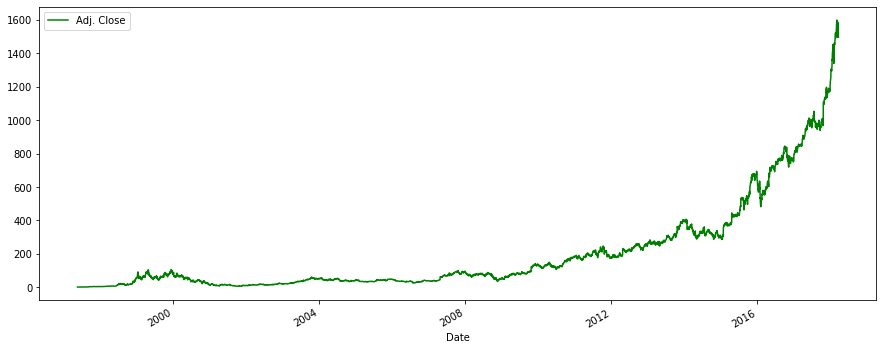

In [11]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show

In [21]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)


forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)


[1500.43660827 1539.28053862 1550.66582855 1536.77173524 1557.67134309
 1573.16001482 1575.11603102 1591.31694779 1614.65094536 1604.05231411
 1604.55194869 1584.35395534 1591.58271086 1616.41561214 1631.33023565
 1639.15430044 1646.44683909 1675.18114225 1695.91066173 1685.05689794
 1688.05470537 1678.82741157 1667.5165353  1639.07988678 1683.28160063
 1678.33840752 1638.19755338 1586.59699566 1650.69904821 1588.18094356]


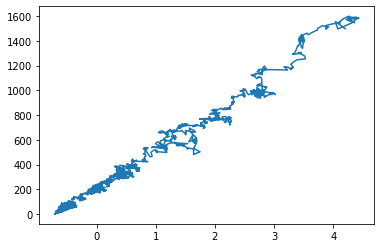

In [23]:
plt.plot(X,y)

NameError: name 'datetime' is not defined

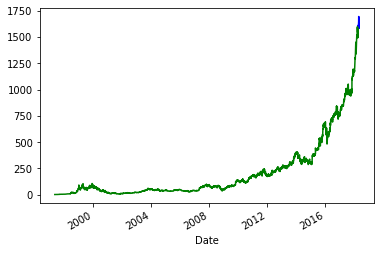

In [31]:
dates = pd.date_range(start ="2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color='b')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))